In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
movies = pd.read_csv(r'Movies_Sample.csv')

In [6]:
movies.head()

,movieId,title,genres
0,260659,Falling for Figaro (2021),Comedy|Romance
1,166338,Young Man of Manhattan (1930),Comedy|Romance
2,265872,Fiddlesticks (1930),Animation
3,1258,"Shining, The (1980)",Horror
4,249352,A Drunk Scorpion Will Sting Itself to Death (2...,Crime|Drama


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10000 non-null  int64 
 1   title    10000 non-null  object
 2   genres   9954 non-null   object
dtypes: int64(1), object(2)
memory usage: 234.5+ KB


In [8]:
movies.describe(include = 'all')

,movieId,title,genres
count,10000.000000,10000,9954
unique,NaN,9996,653
top,NaN,Animal (2023),Drama
freq,NaN,2,1483
mean,168980.804700,NaN,NaN
std,81768.531608,NaN,NaN
min,24.000000,NaN,NaN
25%,119225.500000,NaN,NaN
50%,175199.000000,NaN,NaN
75%,235017.500000,NaN,NaN


In [9]:
movies['genres'].value_counts()

genres
Drama                              1483
Documentary                         918
Comedy                              891
(no genres listed)                  819
Comedy|Drama                        341
                                   ... 
Crime|Horror                          1
Adventure|Animation|Sci-Fi            1
Adventure|Drama|Romance|Sci-Fi        1
Animation|Children|Comedy|Crime       1
Action|Mystery|Romance|Western        1
Name: count, Length: 653, dtype: int64

In [10]:
movies['genres'] = movies['genres'].replace('(no genres listed)', pd.NA)

In [11]:
movies.dropna(subset=['genres'], inplace=True)
movies['genres'].value_counts()

genres
Drama                                    1483
Documentary                               918
Comedy                                    891
Comedy|Drama                              341
Drama|Romance                             307
                                         ... 
Musical|Sci-Fi                              1
Adventure|Drama|Mystery|Thriller            1
Action|Adventure|Sci-Fi|Thriller|IMAX       1
Action|Comedy|Crime|Romance                 1
Action|Mystery|Romance|Western              1
Name: count, Length: 652, dtype: int64

In [12]:
movies = movies[movies['genres'].str.strip() != '']
genres_exploded = movies['genres'].str.split('|').explode()
top_10_genres = genres_exploded.value_counts().nlargest(10)
top_10_genres

genres
Drama          3833
Comedy         2582
Thriller       1335
Action         1149
Romance        1117
Documentary    1066
Horror          998
Crime           807
Adventure       621
Sci-Fi          537
Name: count, dtype: int64

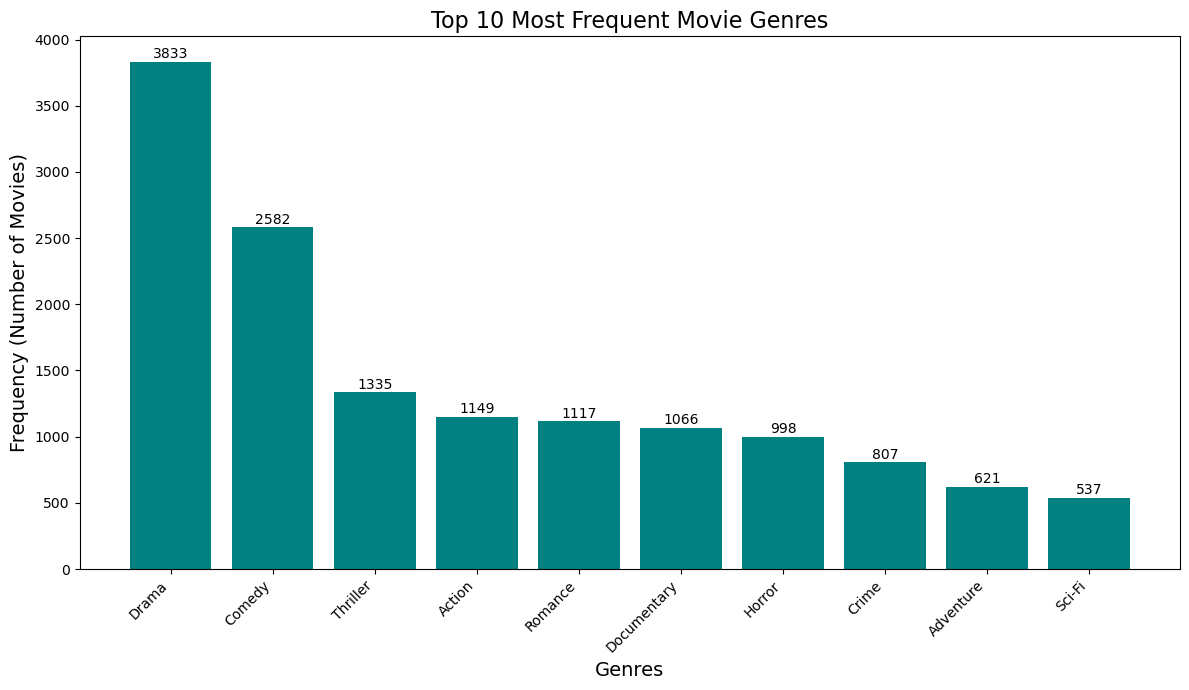

In [13]:
plt.figure(figsize=(12, 7))
plt.bar(top_10_genres.index, top_10_genres.values, color='teal')

plt.title('Top 10 Most Frequent Movie Genres', fontsize=16)
plt.xlabel('Genres', fontsize=14)
plt.ylabel('Frequency (Number of Movies)', fontsize=14) 
plt.xticks(rotation=45, ha='right')

for i, count in enumerate(top_10_genres.values):
    plt.text(i, count + 5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.savefig('Top 10 Most Frequent Movie Genres')

In [14]:
dummy_genres = movies['genres'].str.get_dummies('|')
dummy_genres.iloc[:10, :15]

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0
5,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [15]:
movies.shape

(9135, 3)

In [16]:
dummy_genres.to_csv('DEPI Project', index = False)

In [17]:
movies['year'] = movies['title'].str.extract(r'\((\d{4})\)')
movies['year'] = movies['year'].astype('Int64')
movies['title'] = movies['title'].str.replace(r'\s*\(\d{4}\)', '', regex=True).str.strip()

print(movies[['title', 'year', 'genres']].head())

                                         title  year          genres
0                           Falling for Figaro  2021  Comedy|Romance
1                       Young Man of Manhattan  1930  Comedy|Romance
2                                 Fiddlesticks  1930       Animation
3                                 Shining, The  1980          Horror
4  A Drunk Scorpion Will Sting Itself to Death  2020     Crime|Drama


In [18]:
release_frequency = movies['year'].value_counts().sort_index()
release_frequency = release_frequency[release_frequency > 1]
release_frequency.head(5)

year
1894    3
1896    5
1897    2
1899    2
1900    6
Name: count, dtype: Int64

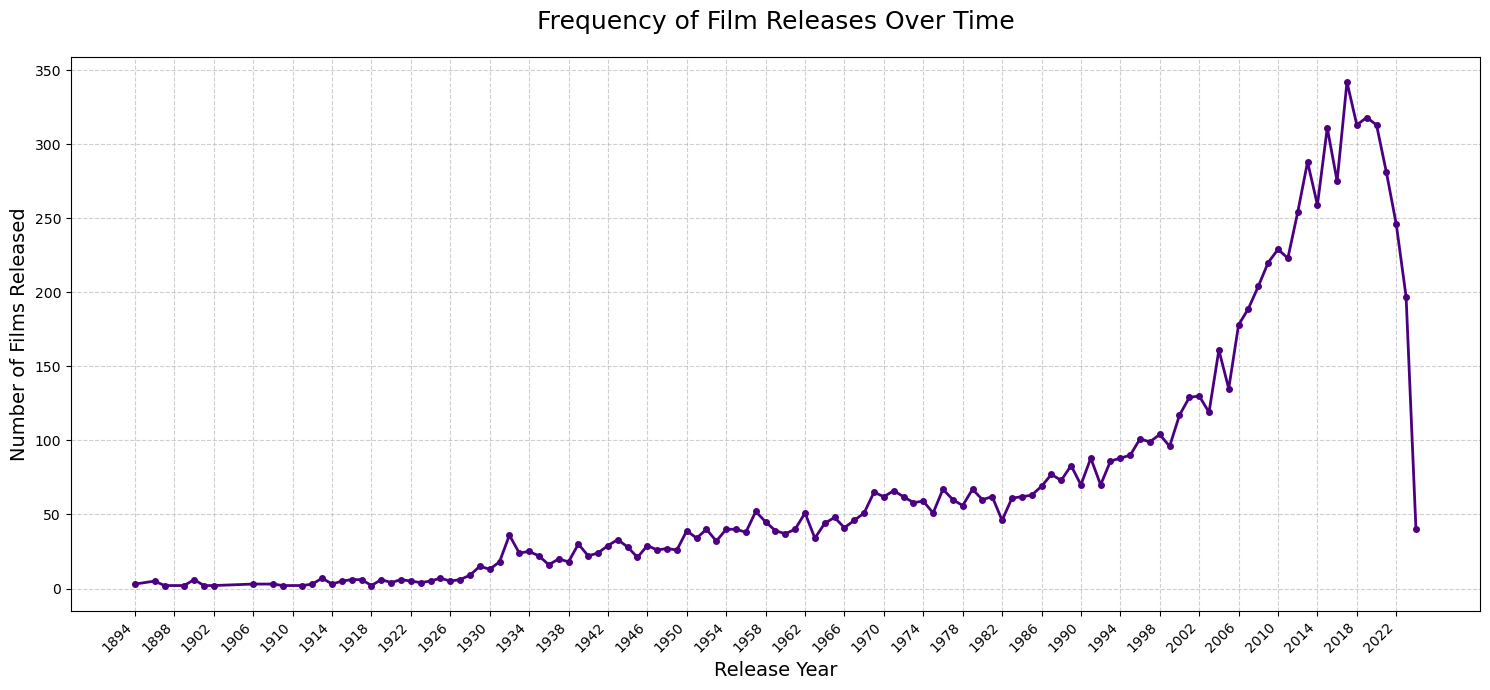

In [19]:
plt.figure(figsize=(15, 7))
plt.plot(release_frequency.index, release_frequency.values, marker='o', linestyle='-', color='indigo', linewidth=2, markersize=4)

plt.title('Frequency of Film Releases Over Time', fontsize=18, pad=20)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Number of Films Released', fontsize=14)

min_year = release_frequency.index.min()
max_year = release_frequency.index.max()

plt.xticks(range(min_year, max_year + 1, 4),rotation=45,ha='right',fontsize=10)

plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout() 

plt.savefig('film_release_frequency_line_chart.png')

In [22]:
ratings = pd.read_csv('ratings_sample.csv')
ratings.head(20)

,userId,movieId,rating,tstamp
0,397992,174055,2.5,2024-01-23 17:21:40
1,150747,5991,4.0,2020-10-10 23:35:29
2,139711,212883,-1.0,2020-10-17 20:38:19
3,389851,780,4.0,2022-10-14 04:40:32
4,246624,5952,3.0,2014-03-14 19:14:22
5,252740,4881,4.5,2014-11-22 04:04:48
6,250671,1222,3.5,2014-08-18 17:28:44
7,58881,116897,4.5,2016-12-27 15:30:52
8,57162,56788,4.0,2008-12-15 10:16:07
9,346590,88744,3.5,2020-01-16 22:30:20


In [23]:
del ratings['userId'], ratings['tstamp']
ratings.head(3)

,movieId,rating
0,174055,2.5
1,5991,4.0
2,212883,-1.0


In [24]:
ratings.shape

(10000, 2)

In [25]:
merged_movies = pd.merge(left=movies,right=ratings,on='movieId',how='inner')
merged_movies.to_csv('merged_movies_and_ratings.csv', index=False)

print(merged_movies.head(10))

   movieId         title                 genres  year  rating
0     1258  Shining, The                 Horror  1980     3.5
1     1258  Shining, The                 Horror  1980     5.0
2     1258  Shining, The                 Horror  1980     5.0
3     1258  Shining, The                 Horror  1980     5.0
4     1258  Shining, The                 Horror  1980     3.5
5     1258  Shining, The                 Horror  1980     4.0
6     1258  Shining, The                 Horror  1980     5.0
7     1258  Shining, The                 Horror  1980     4.0
8     1258  Shining, The                 Horror  1980     2.5
9   130642   Backcountry  Drama|Horror|Thriller  2014     3.5


In [26]:
merged_movies.shape

(896, 5)

In [27]:
df = pd.read_csv('merged_movies_and_ratings.csv')
df.head(5)

,movieId,title,genres,year,rating
0,1258,"Shining, The",Horror,1980.0,3.5
1,1258,"Shining, The",Horror,1980.0,5.0
2,1258,"Shining, The",Horror,1980.0,5.0
3,1258,"Shining, The",Horror,1980.0,5.0
4,1258,"Shining, The",Horror,1980.0,3.5


In [28]:
df['rating'].value_counts()

rating
 3.0    153
 4.0    152
 3.5    149
-1.0    102
 4.5     89
 2.5     71
 5.0     67
 2.0     63
 1.0     19
 0.5     18
 1.5     13
Name: count, dtype: int64

In [29]:
df.dropna(subset=['rating'], inplace=True)
df['rating'].value_counts()

rating
 3.0    153
 4.0    152
 3.5    149
-1.0    102
 4.5     89
 2.5     71
 5.0     67
 2.0     63
 1.0     19
 0.5     18
 1.5     13
Name: count, dtype: int64

In [30]:
df.shape

(896, 5)

In [31]:
avg_ratings_series = merged_movies.groupby('movieId')['rating'].mean()
avg_ratings_df = avg_ratings_series.reset_index()
avg_ratings_df

,movieId,rating
0,36,4.000000
1,88,4.000000
2,145,3.666667
3,150,4.055556
4,165,2.833333
...,...,...
478,292803,4.500000
479,292813,3.500000
480,295507,4.000000
481,295763,3.500000


In [32]:
avg_ratings_df.columns = ['movieId', 'average_rating']

unique_movies = movies[['movieId', 'title', 'genres']].drop_duplicates(subset=['movieId'])

final_movie_sample = pd.merge(left=unique_movies,right=avg_ratings_df,on='movieId',how='inner')

final_movie_sample = final_movie_sample.sort_values(by='average_rating', ascending=False)

final_movie_sample.to_csv('unique_movies_with_average_ratings.csv', index=False)

In [33]:
final_movie_sample.tail(5)

,movieId,title,genres,average_rating
393,60992,"Moment to Remember, A (Nae meorisokui jiwoogae)",Drama|Romance,-1.0
305,246764,Where I Belong,Drama|Romance,-1.0
147,203847,Kumbalangi Nights,Comedy|Drama|Romance,-1.0
153,228935,The Fall of Rock and Roll,Comedy,-1.0
377,194831,Killer Kate!,Horror,-1.0


In [34]:
final_movie_sample['average_rating'].value_counts()

average_rating
-1.000000    81
 3.500000    68
 3.000000    66
 4.000000    57
 2.500000    37
 4.500000    25
 2.000000    25
 5.000000    16
 3.750000     9
 1.500000     8
 3.250000     8
 0.500000     7
 4.250000     6
 1.000000     6
 2.750000     5
 2.833333     4
 3.875000     3
 3.375000     2
 2.600000     2
 2.375000     2
 2.333333     2
 3.333333     2
 4.166667     2
 1.750000     2
 3.666667     2
 3.833333     2
 2.714286     1
 4.400000     1
 2.250000     1
 1.666667     1
 2.300000     1
 1.625000     1
 4.333333     1
 2.571429     1
 2.583333     1
 2.666667     1
 0.000000     1
 2.700000     1
 2.166667     1
 2.900000     1
 2.800000     1
 2.866667     1
 4.055556     1
 3.800000     1
 3.785714     1
 3.700000     1
 3.625000     1
 3.611111     1
 3.600000     1
 3.562500     1
 4.285714     1
 3.285714     1
 3.214286     1
 3.166667     1
 4.666667     1
 3.083333     1
 4.300000     1
 2.916667     1
 4.083333     1
 3.125000     1
Name: count, dtype: int64

In [35]:
final_movie_sample.shape

(483, 4)

In [37]:
final_movie_sample.head()

,movieId,title,genres,average_rating
235,152079,London Has Fallen,Action|Crime|Thriller,5.0
100,202,Total Eclipse,Drama|Romance,5.0
207,72356,Partly Cloudy,Animation|Children|Comedy|Fantasy,5.0
269,2686,"Red Violin, The (Violon rouge, Le)",Drama|Mystery,5.0
271,1124,On Golden Pond,Drama,5.0


In [42]:
final_movie_sample['average_rating'].value_counts

<bound method IndexOpsMixin.value_counts of 235    5.0
100    5.0
207    5.0
269    5.0
271    5.0
      ... 
393   -1.0
305   -1.0
147   -1.0
153   -1.0
377   -1.0
Name: average_rating, Length: 483, dtype: float64>

In [44]:
(final_movie_sample['average_rating'] == -1).sum()

81

In [45]:
(final_movie_sample['average_rating'] != -1).sum()

402

In [46]:
final_movie_sample = final_movie_sample[final_movie_sample['average_rating'] != -1]

In [51]:
(final_movie_sample['average_rating'] == -1).sum()

0

In [52]:
final_movie_sample

,movieId,title,genres,average_rating
235,152079,London Has Fallen,Action|Crime|Thriller,5.0
100,202,Total Eclipse,Drama|Romance,5.0
207,72356,Partly Cloudy,Animation|Children|Comedy|Fantasy,5.0
269,2686,"Red Violin, The (Violon rouge, Le)",Drama|Mystery,5.0
271,1124,On Golden Pond,Drama,5.0
...,...,...,...,...
26,1883,Bulworth,Comedy|Drama|Romance,0.5
60,248190,Someone's Knocking at the Door,Comedy|Horror,0.5
55,66509,Funny People,Comedy|Drama,0.5
339,148667,John Mulaney: The Comeback Kid,Comedy,0.5


In [55]:
#get_dummies
genres_encoded = final_movie_sample['genres'].str.get_dummies('|')
genres_encoded



,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
235,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
207,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
269,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
271,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
60,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
55,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
339,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [56]:
final_movie_sample

,movieId,title,genres,average_rating
235,152079,London Has Fallen,Action|Crime|Thriller,5.0
100,202,Total Eclipse,Drama|Romance,5.0
207,72356,Partly Cloudy,Animation|Children|Comedy|Fantasy,5.0
269,2686,"Red Violin, The (Violon rouge, Le)",Drama|Mystery,5.0
271,1124,On Golden Pond,Drama,5.0
...,...,...,...,...
26,1883,Bulworth,Comedy|Drama|Romance,0.5
60,248190,Someone's Knocking at the Door,Comedy|Horror,0.5
55,66509,Funny People,Comedy|Drama,0.5
339,148667,John Mulaney: The Comeback Kid,Comedy,0.5


In [57]:
final_movie_sample = pd.concat([final_movie_sample, genres_encoded], axis=1)

In [58]:
final_movie_sample

,movieId,title,genres,average_rating,Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
235,152079,London Has Fallen,Action|Crime|Thriller,5.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
100,202,Total Eclipse,Drama|Romance,5.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
207,72356,Partly Cloudy,Animation|Children|Comedy|Fantasy,5.0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
269,2686,"Red Violin, The (Violon rouge, Le)",Drama|Mystery,5.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
271,1124,On Golden Pond,Drama,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,1883,Bulworth,Comedy|Drama|Romance,0.5,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
60,248190,Someone's Knocking at the Door,Comedy|Horror,0.5,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
55,66509,Funny People,Comedy|Drama,0.5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
339,148667,John Mulaney: The Comeback Kid,Comedy,0.5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
df

,movieId,title,genres,year,rating
0,1258,"Shining, The",Horror,1980.0,3.5
1,1258,"Shining, The",Horror,1980.0,5.0
2,1258,"Shining, The",Horror,1980.0,5.0
3,1258,"Shining, The",Horror,1980.0,5.0
4,1258,"Shining, The",Horror,1980.0,3.5
...,...,...,...,...,...
891,173369,You Were Never Really Here,Drama,2017.0,4.0
892,173369,You Were Never Really Here,Drama,2017.0,2.5
893,111364,Godzilla,Action|Adventure|Sci-Fi|IMAX,2014.0,2.5
894,151739,Dirty Grandpa,Comedy,2016.0,3.5


In [71]:
movie_years = df[['movieId', 'year']].drop_duplicates(subset=['movieId'])
movie_years

,movieId,year
0,1258,1980.0
9,130642,2014.0
10,268994,2018.0
11,110553,2014.0
13,7137,2003.0
...,...,...
890,115633,2005.0
891,173369,2017.0
893,111364,2014.0
894,151739,2016.0


In [73]:
final_movie_sample = final_movie_sample.merge(
    df[['movieId', 'year']],   # الأعمدة المطلوبة من df
    on='movieId',              # العمود المشترك بين الداتا سيتين
    how='left'                 # نستخدم left للحفاظ على كل صفوف final_movie_sample
)
final_movie_sample

,movieId,title,genres,average_rating,Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,152079,London Has Fallen,Action|Crime|Thriller,5.0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,2016.0
1,202,Total Eclipse,Drama|Romance,5.0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1995.0
2,72356,Partly Cloudy,Animation|Children|Comedy|Fantasy,5.0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,2009.0
3,2686,"Red Violin, The (Violon rouge, Le)",Drama|Mystery,5.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1998.0
4,1124,On Golden Pond,Drama,5.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1981.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,248190,Someone's Knocking at the Door,Comedy|Horror,0.5,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,2009.0
810,66509,Funny People,Comedy|Drama,0.5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2009.0
811,148667,John Mulaney: The Comeback Kid,Comedy,0.5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2015.0
812,3257,"Bodyguard, The",Drama|Romance|Thriller,0.0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1992.0


In [74]:
col = 'average_rating'
final_movie_sample = final_movie_sample[[c for c in final_movie_sample.columns if c != col] + [col]]
final_movie_sample.head()

,movieId,title,genres,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,average_rating
0,152079,London Has Fallen,Action|Crime|Thriller,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,2016.0,5.0
1,202,Total Eclipse,Drama|Romance,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1995.0,5.0
2,72356,Partly Cloudy,Animation|Children|Comedy|Fantasy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,2009.0,5.0
3,2686,"Red Violin, The (Violon rouge, Le)",Drama|Mystery,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1998.0,5.0
4,1124,On Golden Pond,Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1981.0,5.0


In [75]:
# حذف الاعمدة غير المهمة والتي تم تحويلها الي معلومات رقمية 
final_movie_sample = final_movie_sample.drop(['movieId', 'title', 'genres'], axis=1)

final_movie_sample.head()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year,average_rating
0,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,2016.0,5.0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,1995.0,5.0
2,0,0,1,1,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,2009.0,5.0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1998.0,5.0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1981.0,5.0


In [81]:
# Genre columns
genre_columns = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 
                 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 
                 'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 
                 'Sci-Fi', 'Thriller', 'War', 'Western']


# Genre popularity
genre_counts = final_movie_sample[genre_columns].sum().sort_values(ascending=False)
print("\nMost popular genres:")
print(genre_counts)


Most popular genres:
Drama          362
Action         294
Comedy         231
Adventure      222
Thriller       210
Sci-Fi         198
Crime          125
IMAX           109
Mystery         99
Romance         96
Fantasy         80
Horror          66
Animation       61
Children        51
Documentary     19
War             19
Western         10
Musical          6
Film-Noir        5
dtype: int64


In [89]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Prepare feature matrix (genres + normalized year and rating)
def prepare_features(final_movie_sample):
    """Prepare feature matrix for similarity calculation"""
    features = final_movie_sample.copy()
    
    # Normalize year and rating
    scaler = StandardScaler()
    features['year_normalized'] = scaler.fit_transform(final_movie_sample[['year']].fillna(final_movie_sample['year'].mean()))
    features['rating_normalized'] = scaler.fit_transform(final_movie_sample[['average_rating']])
    
    # Create feature matrix: genres + normalized year + rating
    feature_cols = genre_columns + ['year_normalized', 'rating_normalized']
    feature_matrix = features[feature_cols].values
    
    return feature_matrix, features

In [90]:
# Calculate similarity matrix
feature_matrix, df_features = prepare_features(final_movie_sample)
similarity_matrix = cosine_similarity(feature_matrix)

print("Similarity matrix shape:", similarity_matrix.shape)
print("Sample similarities (first movie with others):")
print(similarity_matrix[0, :10])

Similarity matrix shape: (814, 814)
Sample similarities (first movie with others):
[1.         0.54377029 0.56606626 0.57164693 0.42334168 0.70848323
 0.07880408 0.8047267  0.63149026 0.69930634]


# Content Based recommender

In [91]:
# Content-Based Recommender Function
def recommend_movies_content_based(movie_index, n_recommendations=10, 
                                   min_rating=None, exclude_same_genres=False):
    """
    Recommend movies based on content similarity
    
    Parameters:
    - movie_index: Index of the movie to base recommendations on
    - n_recommendations: Number of movies to recommend
    - min_rating: Minimum rating threshold (optional)
    - exclude_same_genres: If True, exclude movies with identical genres
    """
    # Get similarity scores for the movie
    sim_scores = list(enumerate(similarity_matrix[movie_index]))
    
    # Sort by similarity (descending)
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Filter out the movie itself
    sim_scores = sim_scores[1:]
    
    # Apply filters
    recommendations = []
    for idx, score in sim_scores:
        # Check minimum rating
        if min_rating and final_movie_sample.iloc[idx]['average_rating'] < min_rating:
            continue
            
        # Check if we should exclude identical genre combinations
        if exclude_same_genres:
            original_genres = final_movie_sample.iloc[movie_index][genre_columns].values
            candidate_genres = final_movie_sample.iloc[idx][genre_columns].values
            if np.array_equal(original_genres, candidate_genres):
                continue
        
        recommendations.append((idx, score))
        
        if len(recommendations) >= n_recommendations:
            break
    
    return recommendations

# Example usage
movie_idx = 0
print(f"\nOriginal Movie (index {movie_idx}):")
print(f"Genres: {', '.join([g for g in genre_columns if final_movie_sample.iloc[movie_idx][g] == 1])}")
print(f"Year: {final_movie_sample.iloc[movie_idx]['year']}")
print(f"Rating: {final_movie_sample.iloc[movie_idx]['average_rating']}")

print("\n" + "="*50)
print("TOP 10 RECOMMENDATIONS:")
print("="*50)

recommendations = recommend_movies_content_based(movie_idx, n_recommendations=10, min_rating=3.0)

for i, (idx, score) in enumerate(recommendations, 1):
    genres = ', '.join([g for g in genre_columns if final_movie_sample.iloc[idx][g] == 1])
    print(f"\n{i}. Similarity Score: {score:.4f}")
    print(f"   Genres: {genres}")
    print(f"   Year: {final_movie_sample.iloc[idx]['year']}")
    print(f"   Rating: {final_movie_sample.iloc[idx]['average_rating']:.2f}")



Original Movie (index 0):
Genres: Action, Crime, Thriller
Year: 2016.0
Rating: 5.0

TOP 10 RECOMMENDATIONS:

1. Similarity Score: 0.8392
   Genres: Action, Comedy, Crime
   Year: 2013.0
   Rating: 4.50

2. Similarity Score: 0.8047
   Genres: Action, Comedy
   Year: 2020.0
   Rating: 5.00

3. Similarity Score: 0.7961
   Genres: Action, War
   Year: 2012.0
   Rating: 5.00

4. Similarity Score: 0.7938
   Genres: Crime, Drama, Thriller
   Year: 2007.0
   Rating: 4.30

5. Similarity Score: 0.7938
   Genres: Crime, Drama, Thriller
   Year: 2007.0
   Rating: 4.30

6. Similarity Score: 0.7938
   Genres: Crime, Drama, Thriller
   Year: 2007.0
   Rating: 4.30

7. Similarity Score: 0.7938
   Genres: Crime, Drama, Thriller
   Year: 2007.0
   Rating: 4.30

8. Similarity Score: 0.7938
   Genres: Crime, Drama, Thriller
   Year: 2007.0
   Rating: 4.30

9. Similarity Score: 0.7778
   Genres: Action, Adventure, Comedy, Crime
   Year: 2015.0
   Rating: 4.50

10. Similarity Score: 0.7778
   Genres: Actio

# HybridRecommender System

In [97]:
class HybridRecommender:
    """
    Hybrid recommender combining multiple approaches
    """
    
    def __init__(self, final_movie_sample):
        self.final_movie_sample = final_movie_sample
        self.genre_columns = genre_columns
        self._prepare_similarity_matrices()
    
    def _prepare_similarity_matrices(self):
        """Prepare different similarity matrices"""
        # Content-based similarity (genres + year + rating)
        scaler = StandardScaler()
        year_norm = scaler.fit_transform(self.final_movie_sample[['year']].fillna(self.final_movie_sample['year'].mean()))
        rating_norm = scaler.fit_transform(self.final_movie_sample[['average_rating']])
        
        content_features = np.hstack([
            self.final_movie_sample[self.genre_columns].values,
            year_norm,
            rating_norm
        ])
        self.content_similarity = cosine_similarity(content_features)
        
        # Genre-only similarity
        self.genre_similarity = cosine_similarity(self.final_movie_sample[self.genre_columns].values)
        
        # Rating-weighted genre similarity
        genre_rating_matrix = self.final_movie_sample[self.genre_columns].multiply(
            self.final_movie_sample['average_rating'], axis=0
        )
        self.rating_similarity = cosine_similarity(genre_rating_matrix)
    
    def recommend(self, movie_index, n_recommendations=10, 
                  content_weight=0.4, genre_weight=0.3, rating_weight=0.3,
                  min_rating=None, year_range=None):
        """
        Generate hybrid recommendations
        
        Parameters:
        - movie_index: Index of reference movie
        - n_recommendations: Number of recommendations
        - content_weight: Weight for content-based similarity
        - genre_weight: Weight for genre similarity
        - rating_weight: Weight for rating-based similarity
        - min_rating: Minimum rating threshold
        - year_range: Tuple (min_year, max_year) to filter by year
        """
        # Combine similarities with weights
        combined_similarity = (
            content_weight * self.content_similarity[movie_index] +
            genre_weight * self.genre_similarity[movie_index] +
            rating_weight * self.rating_similarity[movie_index]
        )
        
        # Get similarity scores
        sim_scores = list(enumerate(combined_similarity))
        sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
        
        # Filter recommendations
        recommendations = []
        for idx, score in sim_scores[1:]:  # Skip the movie itself
            movie = self.final_movie_sample.iloc[idx]
            
            # Apply filters
            if min_rating and movie['average_rating'] < min_rating:
                continue
            
            if year_range:
                movie_year = movie['year']
                if pd.notna(movie_year) and (movie_year < year_range[0] or movie_year > year_range[1]):
                    continue
            
            recommendations.append({
                'index': idx,
                'similarity_score': score,
                'genres': [g for g in self.genre_columns if movie[g] == 1],
                'year': movie['year'],
                'rating': movie['average_rating']
            })
            
            if len(recommendations) >= n_recommendations:
                break
        
        return recommendations
    
    def recommend_by_genres(self, preferred_genres, n_recommendations=10, 
                           min_rating=3.0):
        """
        Recommend movies based on genre preferences
        
        Parameters:
        - preferred_genres: List of preferred genres
        - n_recommendations: Number of recommendations
        - min_rating: Minimum rating threshold
        """
        # Create preference vector
        pref_vector = np.zeros(len(self.genre_columns))
        for i, genre in enumerate(self.genre_columns):
            if genre in preferred_genres:
                pref_vector[i] = 1
        
        # Calculate similarity to preference vector
        movie_genres = self.final_movie_sample[self.genre_columns].values
        similarities = cosine_similarity([pref_vector], movie_genres)[0]
        
        # Weight by rating
        weighted_scores = similarities * self.final_movie_sample['average_rating'].values
        
        # Get top recommendations
        top_indices = np.argsort(weighted_scores)[::-1]
        
        recommendations = []
        for idx in top_indices:
            movie = self.final_movie_sample.iloc[idx]
            
            if movie['average_rating'] < min_rating:
                continue
            
            recommendations.append({
                'index': int(idx),
                'score': float(weighted_scores[idx]),
                'genres': [g for g in self.genre_columns if movie[g] == 1],
                'year': movie['year'],
                'rating': movie['average_rating']
            })
            
            if len(recommendations) >= n_recommendations:
                break
        
        return recommendations


# Example usage
recommender = HybridRecommender(final_movie_sample)

# Example 1: Recommend based on a specific movie
movie_idx = 0
print(f"Reference Movie (index {movie_idx}):")
ref_movie = final_movie_sample.iloc[movie_idx]
print(f"Genres: {', '.join([g for g in genre_columns if ref_movie[g] == 1])}")
print(f"Year: {ref_movie['year']}")
print(f"Rating: {ref_movie['average_rating']:.2f}")

print("\n" + "="*60)
print("HYBRID RECOMMENDATIONS:")
print("="*60)

recs = recommender.recommend(movie_idx, n_recommendations=10, min_rating=3.5)

for i, rec in enumerate(recs, 1):
    print(f"\n{i}. Similarity Score: {rec['similarity_score']:.4f}")
    print(f"   Genres: {', '.join(rec['genres'])}")
    print(f"   Year: {rec['year']}")
    print(f"   Rating: {rec['rating']:.2f}")

# Example 2: Recommend by genre preferences
print("\n" + "="*60)
print("RECOMMENDATIONS BY GENRE PREFERENCE:")
print("="*60)
print("Preferred genres: Action, Sci-Fi, Thriller")

genre_recs = recommender.recommend_by_genres(
    ['Action', 'Sci-Fi', 'Thriller'], 
    n_recommendations=5, 
    min_rating=4.0
)

for i, rec in enumerate(genre_recs, 1):
    print(f"\n{i}. Score: {rec['score']:.4f}")
    print(f"   Genres: {', '.join(rec['genres'])}")
    print(f"   Year: {rec['year']}")
    print(f"   Rating: {rec['rating']:.2f}")


Reference Movie (index 0):
Genres: Action, Crime, Thriller
Year: 2016.0
Rating: 5.00

HYBRID RECOMMENDATIONS:

1. Similarity Score: 0.9101
   Genres: Action, Crime, Thriller
   Year: 2020.0
   Rating: 3.50

2. Similarity Score: 0.9101
   Genres: Action, Crime, Thriller
   Year: 2020.0
   Rating: 3.50

3. Similarity Score: 0.7950
   Genres: Action, Crime, Horror, Thriller
   Year: 2011.0
   Rating: 3.50

4. Similarity Score: 0.7789
   Genres: Action, Comedy, Crime, Thriller
   Year: 2004.0
   Rating: 3.50

5. Similarity Score: 0.7710
   Genres: Action, Crime
   Year: 2016.0
   Rating: 3.50

6. Similarity Score: 0.7404
   Genres: Action, Thriller
   Year: 2001.0
   Rating: 3.50

7. Similarity Score: 0.7357
   Genres: Action, Comedy, Crime
   Year: 2013.0
   Rating: 4.50

8. Similarity Score: 0.7255
   Genres: Action, Crime, Drama, Thriller
   Year: 1992.0
   Rating: 3.50

9. Similarity Score: 0.7175
   Genres: Crime, Drama, Thriller
   Year: 2007.0
   Rating: 4.30

10. Similarity Score: 